In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import statistics
import random
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv("household_power_consumption.txt", sep=';', header=0, na_values=['nan','?'])
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [3]:
df.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [4]:
df = df[['Date', 'Time', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
df['date_time'] = df['Date'] + ' ' + df['Time']
df.head()

,Date,Time,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
0,16/12/2006,17:24:00,0.0,1.0,17.0,16/12/2006 17:24:00
1,16/12/2006,17:25:00,0.0,1.0,16.0,16/12/2006 17:25:00
2,16/12/2006,17:26:00,0.0,2.0,17.0,16/12/2006 17:26:00
3,16/12/2006,17:27:00,0.0,1.0,17.0,16/12/2006 17:27:00
4,16/12/2006,17:28:00,0.0,1.0,17.0,16/12/2006 17:28:00


In [5]:
df['date_time'] = pd.to_datetime(df['date_time'], format='%d/%m/%Y %H:%M:00')
df.head()

,Date,Time,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
0,16/12/2006,17:24:00,0.0,1.0,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,0.0,1.0,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,0.0,2.0,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,0.0,1.0,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,0.0,1.0,17.0,2006-12-16 17:28:00


In [6]:
df.dtypes

Date                      object
Time                      object
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
date_time         datetime64[ns]
dtype: object

In [7]:
print(df[['date_time', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].head().to_latex())

\begin{tabular}{llrrr}
\toprule
{} &           date\_time &  Sub\_metering\_1 &  Sub\_metering\_2 &  Sub\_metering\_3 \\
\midrule
0 & 2006-12-16 17:24:00 &             0.0 &             1.0 &            17.0 \\
1 & 2006-12-16 17:25:00 &             0.0 &             1.0 &            16.0 \\
2 & 2006-12-16 17:26:00 &             0.0 &             2.0 &            17.0 \\
3 & 2006-12-16 17:27:00 &             0.0 &             1.0 &            17.0 \\
4 & 2006-12-16 17:28:00 &             0.0 &             1.0 &            17.0 \\
\bottomrule
\end{tabular}



In [8]:
df['consumption'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
df.head()

,Date,Time,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time,consumption
0,16/12/2006,17:24:00,0.0,1.0,17.0,2006-12-16 17:24:00,18.0
1,16/12/2006,17:25:00,0.0,1.0,16.0,2006-12-16 17:25:00,17.0
2,16/12/2006,17:26:00,0.0,2.0,17.0,2006-12-16 17:26:00,19.0
3,16/12/2006,17:27:00,0.0,1.0,17.0,2006-12-16 17:27:00,18.0
4,16/12/2006,17:28:00,0.0,1.0,17.0,2006-12-16 17:28:00,18.0


In [9]:
df['hour'] = df['date_time'].apply(lambda x: x.hour)
df['min'] = df['date_time'].apply(lambda x: x.minute)
df.head()

,Date,Time,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time,consumption,hour,min
0,16/12/2006,17:24:00,0.0,1.0,17.0,2006-12-16 17:24:00,18.0,17,24
1,16/12/2006,17:25:00,0.0,1.0,16.0,2006-12-16 17:25:00,17.0,17,25
2,16/12/2006,17:26:00,0.0,2.0,17.0,2006-12-16 17:26:00,19.0,17,26
3,16/12/2006,17:27:00,0.0,1.0,17.0,2006-12-16 17:27:00,18.0,17,27
4,16/12/2006,17:28:00,0.0,1.0,17.0,2006-12-16 17:28:00,18.0,17,28


In [10]:
df = df.groupby(['hour', 'min'], as_index=False).agg({'consumption' : ['mean']})
df[0:4]

,hour,min,consumption
,,,mean
0,0,0,4.537868
1,0,1,4.524544
2,0,2,4.568022
3,0,3,4.599579


In [11]:
print(df[0:10].to_latex())

\begin{tabular}{lrrr}
\toprule
{} & hour & min & consumption \\
{} &        mean \\
\midrule
0 &    0 &   0 &    4.537868 \\
1 &    0 &   1 &    4.524544 \\
2 &    0 &   2 &    4.568022 \\
3 &    0 &   3 &    4.599579 \\
4 &    0 &   4 &    4.600281 \\
5 &    0 &   5 &    4.666199 \\
6 &    0 &   6 &    4.443198 \\
7 &    0 &   7 &    4.525947 \\
8 &    0 &   8 &    4.596073 \\
9 &    0 &   9 &    4.539972 \\
\bottomrule
\end{tabular}



In [12]:
import pickle
df2 = pickle.loads(pickle.dumps(df))
df2['consump'] = df2['consumption']['mean']
df2['min'] = df2['min'].apply(lambda x: int(x / 2)*2)
df2 = df2.groupby(['hour', 'min'], as_index = False).agg({'consump' : ['mean']})
df2['time'] = df2['hour'].apply(str) + ":" + df2['min'].apply(str)
df2['time'] = pd.to_datetime(df2['time'], format='%H:%M')
df2.head()

,hour,min,consump,time
,,,mean,
0,0,0,4.531206,1900-01-01 00:00:00
1,0,2,4.583801,1900-01-01 00:02:00
2,0,4,4.633240,1900-01-01 00:04:00
3,0,6,4.484572,1900-01-01 00:06:00
4,0,8,4.568022,1900-01-01 00:08:00


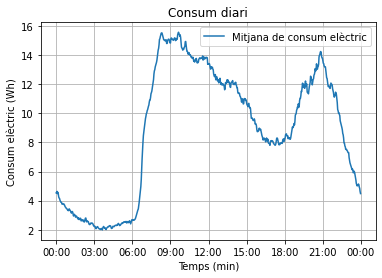

In [13]:
fig, ax = plt.subplots(1)
xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(df2['time'], df2['consump'], label='Mitjana de consum elèctric')
plt.xlabel("Temps (min)")
plt.ylabel("Consum elèctric (Wh)")
plt.title("Consum diari")
plt.grid(True)
plt.legend()
plt.show()
fig.savefig('consumptionmin.png')

In [14]:
df2['consumption'] = df2['consump']['mean']
df2['consumptionmax'] = df2['consumption'] * 1.1
df2['consumptionmin'] = df2['consumption'] * 0.9
df2

,hour,min,consump,time,consumption,consumptionmax,consumptionmin
,,,mean,,,,
0,0,0,4.531206,1900-01-01 00:00:00,4.531206,4.984327,4.078086
1,0,2,4.583801,1900-01-01 00:02:00,4.583801,5.042181,4.125421
2,0,4,4.633240,1900-01-01 00:04:00,4.633240,5.096564,4.169916
3,0,6,4.484572,1900-01-01 00:06:00,4.484572,4.933029,4.036115
4,0,8,4.568022,1900-01-01 00:08:00,4.568022,5.024825,4.111220
...,...,...,...,...,...,...,...
715,23,50,5.098177,1900-01-01 23:50:00,5.098177,5.607994,4.588359
716,23,52,4.935484,1900-01-01 23:52:00,4.935484,5.429032,4.441935
717,23,54,4.848878,1900-01-01 23:54:00,4.848878,5.333766,4.363990


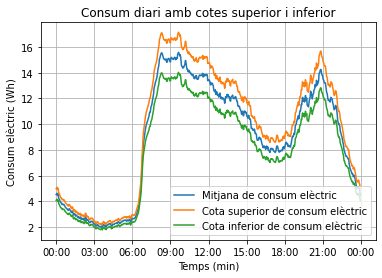

In [15]:
fig, ax = plt.subplots(1)
ax.plot(df2['time'], df2['consumption'], label='Mitjana de consum elèctric')
plt.plot(df2['time'], df2['consumptionmax'], label='Cota superior de consum elèctric')
plt.plot(df2['time'], df2['consumptionmin'], label='Cota inferior de consum elèctric')
xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.xlabel("Temps (min)")
plt.grid(True)
plt.ylabel("Consum elèctric (Wh)")
plt.title("Consum diari amb cotes superior i inferior")
plt.legend()
fig.savefig('consumptionmin2.png')

In [16]:
df['min'] = df['min'] / 60 * 4
df['min'] = df['min'].apply(int)

In [17]:
df = df.groupby(['hour', 'min'], as_index=False).sum()
df.head()

/home/oriol/.local/lib/python3.8/site-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,hour,min,consumption
,,,mean
0,0,0,67.198457
1,0,1,59.178613
2,0,2,55.625702
3,0,3,51.168539
4,1,0,49.521770


In [18]:
df['consumption']

,mean
0,67.198457
1,59.178613
2,55.625702
3,51.168539
4,49.521770
...,...
91,112.691218
92,101.992987
93,91.364656
94,81.185133


In [19]:
df['hour'] = pd.DataFrame(df.index)[0].apply(lambda x: int(x/4 % 24))
df['min'] = pd.DataFrame(df.index)[0].apply(lambda x: int(x % 4) * 15)
df['time'] = df['hour'].apply(str) + ":" + df['min'].apply(str)
df['time'] = pd.to_datetime(df['time'], format='%H:%M')
df.head()

,hour,min,consumption,time
,,,mean,
0,0,0,67.198457,1900-01-01 00:00:00
1,0,15,59.178613,1900-01-01 00:15:00
2,0,30,55.625702,1900-01-01 00:30:00
3,0,45,51.168539,1900-01-01 00:45:00
4,1,0,49.521770,1900-01-01 01:00:00


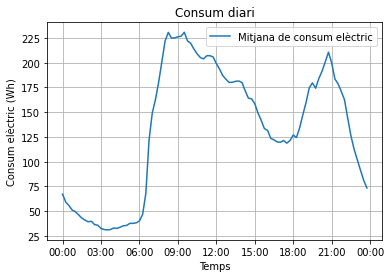

In [20]:
fig, ax = plt.subplots(1)
xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(df['time'], df['consumption'], label='Mitjana de consum elèctric')
plt.xlabel("Temps")
plt.ylabel("Consum elèctric (Wh)")
plt.title("Consum diari")
plt.legend()
plt.grid(True)
plt.show()
fig.savefig('consumption.png')

In [21]:
df['consumption'] = df['consumption']['mean']
df['consumptionmax'] = df['consumption'] * 1.1 + 10
df['consumptionmin'] = df['consumption'] * 0.9
df.head()

,hour,min,consumption,time,consumptionmax,consumptionmin
,,,mean,,,
0,0,0,67.198457,1900-01-01 00:00:00,83.918303,60.478612
1,0,15,59.178613,1900-01-01 00:15:00,75.096474,53.260751
2,0,30,55.625702,1900-01-01 00:30:00,71.188272,50.063132
3,0,45,51.168539,1900-01-01 00:45:00,66.285393,46.051685
4,1,0,49.521770,1900-01-01 01:00:00,64.473947,44.569593


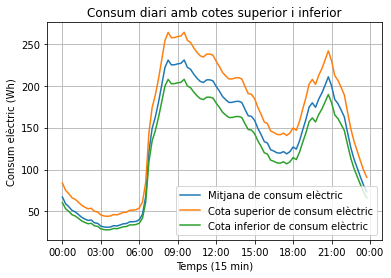

In [22]:
fig, ax = plt.subplots(1)
ax.plot(df['time'], df['consumption'], label='Mitjana de consum elèctric')
plt.plot(df['time'], df['consumptionmax'], label='Cota superior de consum elèctric')
plt.plot(df['time'], df['consumptionmin'], label='Cota inferior de consum elèctric')
xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.xlabel("Temps (15 min)")
plt.ylabel("Consum elèctric (Wh)")
plt.grid(True)
plt.title("Consum diari amb cotes superior i inferior")
plt.legend()
fig.savefig('consumption2.png')

In [23]:
def go():
    for imeter in range(512):
        filemeter = open(f'consumptions/meter{imeter}.txt', mode='w+')
        for index in df.index:
            print(random.choice(np.arange(df[df.index == index]['consumptionmin'].item(), df[df.index == index]['consumptionmax'].item(), 0.5)), file=filemeter)
        filemeter.close()
go()

In [24]:
df['consumptionmax'].max()

263.8620390743232

In [25]:
df

,hour,min,consumption,time,consumptionmax,consumptionmin
,,,mean,,,
0,0,0,67.198457,1900-01-01 00:00:00,83.918303,60.478612
1,0,15,59.178613,1900-01-01 00:15:00,75.096474,53.260751
2,0,30,55.625702,1900-01-01 00:30:00,71.188272,50.063132
3,0,45,51.168539,1900-01-01 00:45:00,66.285393,46.051685
4,1,0,49.521770,1900-01-01 01:00:00,64.473947,44.569593
...,...,...,...,...,...,...
91,22,45,112.691218,1900-01-01 22:45:00,133.960340,101.422096
92,23,0,101.992987,1900-01-01 23:00:00,122.192286,91.793689
93,23,15,91.364656,1900-01-01 23:15:00,110.501122,82.228191
